In [5]:
import pandas as pd
% matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [6]:
df= pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [7]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [8]:
df.shape

(81937, 15)

In [9]:
#analyze only 30,000 rows 
df = df.head(30000)

In [10]:
#Check that you have only 30,000 rows 
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [11]:
#Each row shows a dog with a license
#Animal Gender tells us if the dog is male (M) or female (F)
#Vaccinated tells us if the dog is vaccinated (Yes) or not vaccinated (No)

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [12]:
# 1/ How many primary breeds of dogs are in our data set?
# 2/ Are most dogs spayed or neutered?
# 3/ Are most dogs vaccinated?
# 4/ How many licenses have expired already?
df.head(n=3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12


# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

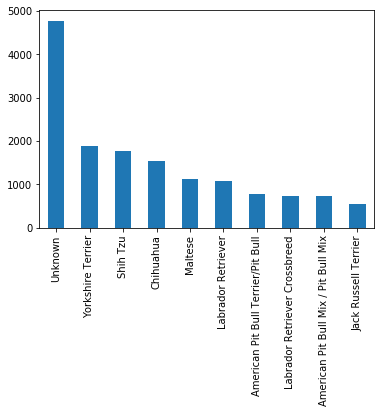

In [13]:
df['Primary Breed'].value_counts().head(n=10).plot(kind='bar')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

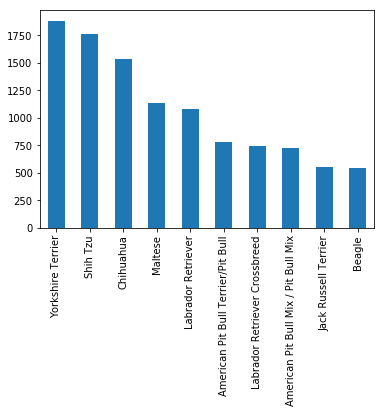

In [14]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(n=10).plot(kind='bar')

## What are the most popular dog names?

In [15]:
df['Animal Name'] = df['Animal Name'].str.replace('UNKNOWN', 'Unknown')

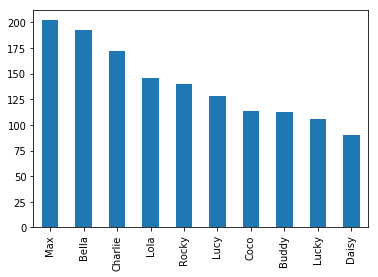

In [16]:
df[df['Animal Name'] != 'Unknown']['Animal Name'].value_counts().head(n=10).plot(kind='bar')

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [17]:
#31 dogs are named Emma
df[df['Animal Name'] == 'Emma'].shape

(31, 15)

In [18]:
#202 dogs are named Max
df[df['Animal Name'] == 'Max'].shape

(202, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [19]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [20]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [21]:
#The number of rows is greater than the No+Yes. There are NaN values in this column
df.shape

(30000, 15)

In [22]:
#To find the NaN values
df[df['Guard or Trained'].isnull()].head(n=3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [23]:
df['Guard or Trained'].fillna("No", inplace=True)

In [24]:
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [25]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=["Unknown", "UNKNOWN", "???"])

In [26]:
guarddogs = df[df['Guard or Trained'] == 'Yes']

In [27]:
guarddogs['Primary Breed'].value_counts().head()

German Shepherd Dog                     4
Rottweiler                              3
Chihuahua                               3
Labrador Retriever                      3
American Pit Bull Mix / Pit Bull Mix    3
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [28]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [29]:
df['year'].head()

0    2007
1    2013
2    2014
3    2008
4    2014
Name: year, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [30]:
df['age'] = 2017 - df['year']
df['age'].head()

0    10
1     4
2     3
3     9
4     3
Name: age, dtype: int64

In [31]:
#dogs are on average 7.24 years old
df['age'].mean()

7.3418480051747075

# Joining data together

In [32]:
zip= pd.read_csv("zipcodes-neighborhoods.csv")
zip.head(50)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
5,Bronx Park and Fordham,10468,Bronx
6,High Bridge and Morrisania,10451,Bronx
7,High Bridge and Morrisania,10452,Bronx
8,High Bridge and Morrisania,10456,Bronx
9,Hunts Point and Mott Haven,10454,Bronx


In [33]:
df.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [34]:
combined_df = df.merge(zip, left_on="Owner Zip Code", right_on="zip")
combined_df.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [35]:
bronx= combined_df[combined_df['borough'] == 'Bronx']
bronx['Animal Name'].value_counts().head(3)
#In the Bronx, the most popular dog names are Bella, Max, and Charlie

Rocky    60
Max      56
Bella    54
Name: Animal Name, dtype: int64

In [55]:
bronx.shape

(7951, 20)

In [36]:
brooklyn= combined_df[combined_df['borough'] == 'Brooklyn']

In [39]:
brooklyn['Animal Name'].value_counts().head()
#In Brooklyn, the most popular dog names are Max, Bella, and Charlie

unknown    234
Max        113
Bella      112
Charlie     96
Lola        88
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [40]:
combined_df.groupby('borough')['Primary Breed'].value_counts().groupby(level =0).head(3)

borough        Primary Breed     
Bronx          Yorkshire Terrier      753
               Shih Tzu               682
               Chihuahua              553
Brooklyn       Yorkshire Terrier     1316
               Shih Tzu              1236
               Chihuahua              987
Manhattan      Yorkshire Terrier     1402
               Chihuahua             1287
               Shih Tzu              1227
Queens         Yorkshire Terrier     1085
               Shih Tzu              1042
               Maltese                806
Staten Island  Yorkshire Terrier      525
               Shih Tzu               501
               Labrador Retriever     404
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [46]:
spayed = df[df['Spayed or Neut']=='Yes']
spayed.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9


In [48]:
spayed['Primary Breed'].value_counts().head(3)

Shih Tzu             3600
Yorkshire Terrier    3571
Chihuahua            3179
Name: Primary Breed, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [97]:
#skipped# 

## How many dogs are in each borough? Plot it in a graph.

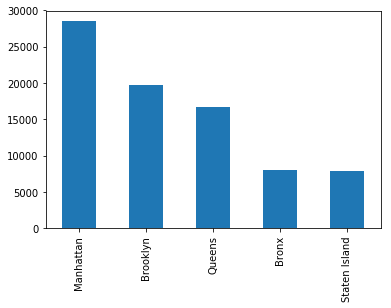

In [65]:
combined_df['borough'].value_counts().sort_values(ascending=False).head().plot(kind='bar')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [72]:
#read population csv
pop= pd.read_csv("boro_population.csv")
pop.head(3)

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71


In [71]:
combined_df.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan


In [75]:
#join combined_df with pop
final_df= combined_df.merge(pop, left_on='borough', right_on='borough')
final_df.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23


In [96]:
#skipped# To find dogs per capita by borough divide dog pop for each borough / population
dog_borough = final_df['borough'].value_counts()
final_df['per_capita'] = dog_borough / final_df['population']
final_df.groupby('borough')['per_capita'].value_counts()

Series([], Name: per_capita, dtype: int64)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

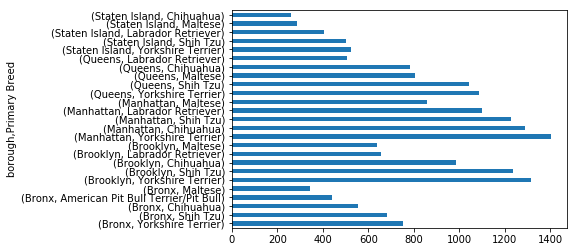

In [101]:
combined_df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [102]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64